## Exploratory Data Analysis Stage One: App Performance Overview 
Stage one of our exploratory data analysis aims to expose patterns and yield insight into the nature and intensity of the customer experience within the IOS app user community. 

### The Dataset
The dataset contains the following product descriptive, rating, price, and developer data for some 475,132 apps from the App Store. 

| #  | Variable                | Date Type  | Description                                |
|----|-------------------------|------------|--------------------------------------------|
| 1  | id                      | Nominal    | App Id from the App Store                  |
| 2  | name                    | Nominal    | App Name                                   |
| 3  | description             | Nominal    | App Description                            |
| 4  | category_id             | Nominal | Numeric category identifier                |
| 5  | category                | Nominal    | Category name                              |
| 6  | price                   | Continuous | App Price                                  |
| 7  | developer_id            | Nominal    | Identifier for the developer               |
| 8  | developer               | Nominal    | Name of the developer                      |
| 9  | rating                  | Ordinal   | Average user rating since first released   |
| 10 | ratings                 | Discrete   | Number of ratings since first release      |
| 11 | released                | Continuous   | Datetime of first release                  |

### EDA Approach
Our exploration will comprise the following five analyses.

1. Structural Analysis: Examine the overall shape, structure, and type of the data.
2. Data Quality Analysis: Assess quality and suitability of the data in terms of missing values, outliers, duplication, cardinality, and feature values.
3. Univariate Analysis: Explore the distributions of rating count, average rating, categories, and price.
4. Bivariate Analysis: Evaluate ratings, rating count, reviews and correlation analysis between two variables.    
5. Multivariate Analysis: Cluster, factor, and correspondence analysis of three or more variables simultaneously.
6. Conclusions, insights and questions for stage two.


### Import Python Libraries and Provision Dependencies

In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import HTML, display_html

from edation.visual.distribution import Histogram, KDEPlot, BoxPlot, ViolinPlot, ECDFPlot

#from edation.explorer.visual.distribution import Histogram, KDEPlot, BoxPlot, ViolinPlot, ECDFPlot
from appstore.data.dataset.appdata import AppDataDataset
from appstore.container import AppstoreContainer

container = AppstoreContainer()
container.init_resources()
container.wire(packages=["appstore.data.dataset"])
dataset = AppDataDataset()

### Structural Analysis
The structure and characteristics of the AppData dataset are as follows:

In [2]:
df1 = dataset.structure
df2 = dataset.dtypes

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Dataset Structure")
df2_style = df2.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Dataset Data Types")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Characteristic,Total
0,Number of Observations,475132
1,Number of Variables,11
2,Number of Cells,5226452
3,Size (Bytes),962579922
,Data Type,Number of Features
0,Number of Nominal Data Types,7
1,Number of Continuous Data Types,2
2,Number of Discrete Data Types,1
3,Number of Ordinal Data Types,1


As indicated above, we have approximately 475,000 apps in our dataset, described by 11 features. Let's take a quick look.

In [3]:
dataset.head()

,id,name,description,category_id,category,price,developer_id,developer,rating,ratings,released
0,6446790238,Mood Tracker :,Understanding and managing your emotions is cr...,6013,Health & Fitness,0.00,1436021751,CARECLINIC SOFTWARE INC.,5.00,6,2023-04-18 07:00:00
1,6447916914,Empire App Virtual,"With the Empire App, you can: -join our gym -...",6013,Health & Fitness,0.00,1603858924,Body Evolution Warfighter LLC,0.00,0,2023-04-21 07:00:00
2,6448082493,CrossFit 926,For members of CrossFit 926 to reserve their p...,6013,Health & Fitness,0.00,688595778,PushPress,0.00,0,2023-04-21 07:00:00
3,6447812886,Shoreline CrossFit,For members of Shoreline CrossFit to reserve t...,6013,Health & Fitness,0.00,688595778,PushPress,0.00,0,2023-04-20 07:00:00
4,1631374974,myAxonics,Find relief from your bladder and bowel contro...,6013,Health & Fitness,0.00,1631374976,Axonics Modulation Technologies,0.00,0,2023-04-21 07:00:00


Identity variables, specifically (app) id and developer_id will be retained for data processing purposes, but have no other value and will be largely ignored during this analysis. 

### Data Quality Analysis
Data type, cardinality, validity, duplication, and size data are summarized at the variable level. 

In [4]:
dataset.quality


,Column,Format,Data Type,Valid,Null,Validity,Cardinality,Percent Unique,Size
0,id,string[python],Nominal,475132,0,1.00,475132,1.00,31748470
1,name,string[python],Nominal,475132,0,1.00,474250,1.00,40449624
2,description,string[python],Nominal,475132,0,1.00,463635,0.98,1186227495
3,category_id,category,Nominal,475132,0,1.00,26,0.00,477790
4,category,category,Nominal,475132,0,1.00,26,0.00,477944
5,price,float64,Continuous,475132,0,1.00,125,0.00,3801056
6,developer_id,string[python],Nominal,475132,0,1.00,265367,0.56,31666555
7,developer,string[python],Nominal,475132,0,1.00,264402,0.56,37093493
8,rating,float64,Ordinal,475132,0,1.00,44083,0.09,3801056
9,ratings,int64,Discrete,475132,0,1.00,14531,0.03,3801056


**Observations**
- With the exception of released (date), we have no missing values. 
- Id's are unique and name, description, developer information, are all high-cardinality
- Category id and label are low-cardinality with 26 unique values, each. 

#### Numeric Variable Data Quality
Each feature has been cast to an appopriate data type and missing data are not extant for the dataset. Valid values for the numeric variables are:

| Variable                | Date Type  | Valid Values                                    |
|-------------------------|------------|-------------------------------------------------|
| price                   | Continuous | Non negative values                             |
| rating                  | Interval   | Real valued in [0,5]                            |
| ratings                 | Discrete   | Discrete and non-negative                       |
| released                | Continuous | Datetimes between June 10, 2008 and present day. |

Let's check the ranges for these variables.

In [5]:
dataset.describe(include=[np.number, np.datetime64])[["min","max"]]

,min,max
price,0.00,999.99
rating,0.00,5.00
ratings,0.00,"30,835,421.00"
released,2008-09-27 04:53:00,2023-11-15 08:00:00


All numeric and datetime values are within range.

#### Categorical Variable Data Quality

The id, name, description, developer_id, and developer variables are nominal, high cardinality strings with no restrictions on the values they may contain. Category and category_id; in contrast, must contain one of 26 category id / category values selected for this analysis.  

In [6]:
columns = ['category_id', 'category']
dataset.unique(columns=columns)

,category_id,category
0,6013,Health & Fitness
1,6017,Education
2,6000,Business
3,6012,Lifestyle
4,6004,Sports
5,6014,Games
6,6007,Productivity
7,6002,Utilities
8,6027,Graphics & Design
9,6010,Navigation


Category and category_id values are as expected. 
### Univariate Analysis
The histograms, probability density plots, violin plots, and descriptive statistics reveal the distribution, centrality, dispersion, and variation of rating, rating count, price and release dates.
##### Average User Rating


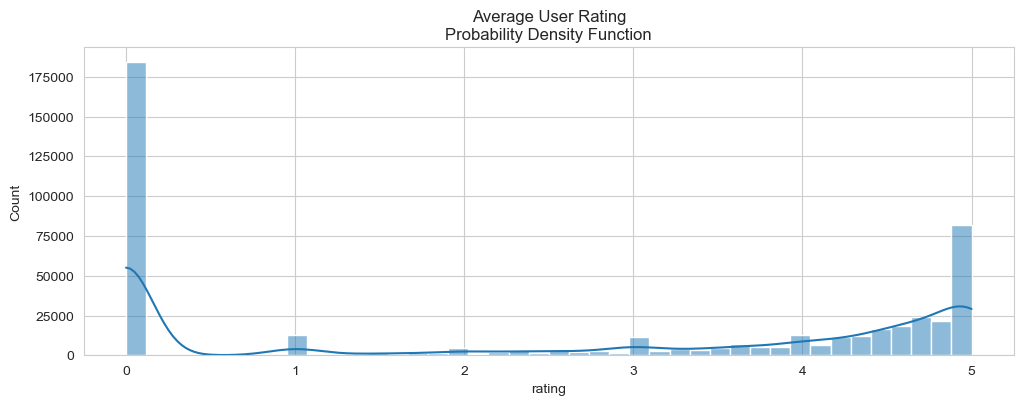

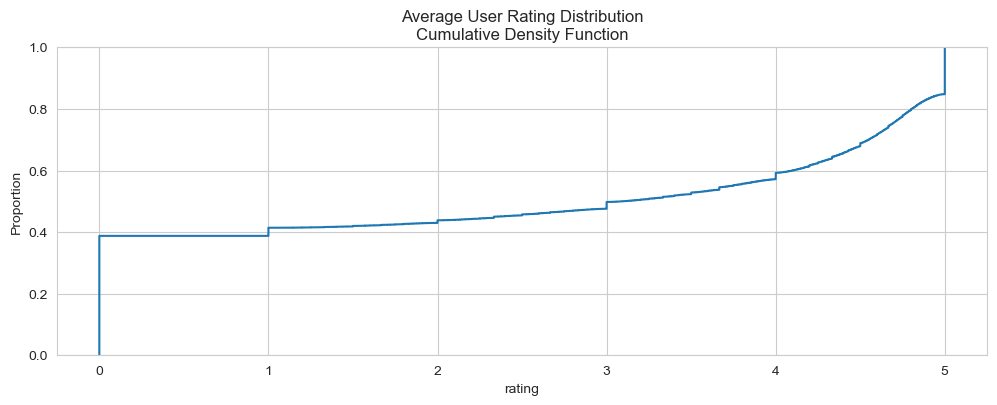

In [7]:
df = dataset.as_df()
pdf = Histogram()
pdf(data=df, x='rating', title="Average User Rating\nProbability Density Function")
cdf = ECDFPlot()
cdf(data=df, x='rating', title="Average User Rating Distribution\nCumulative Density Function")

In [8]:
display_html(df['rating'].describe().to_frame().T)

,count,mean,std,min,25%,50%,75%,max
rating,"475,132.00",2.50,2.17,0.00,0.00,3.09,4.68,5.00


**Observations**
- A plurality (>175,000) of apps have average user ratings of zero, indicating that these apps have not been rated.
- The average of the average user ratings centers at 2.5.  
- 